# COVID-19 prehled CZ

## Zdroj dat: https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19

### Skript pro analyzu dat zverejnovanych mzcr o covid19, konkretne pocty nakazenych v krajich a okresech, pocty uzravenych a pocty mrtvych.

### Zavedeni opatreni: 12.3.2020
### Ukonceni opatreni: 25.5.2020
### Zavedeni opatreni: 10.9.2020

In [1]:
# -------------------- Importy --------------------
# potrebuji instalaci
import httplib2
import matplotlib.pyplot as plt

# default importy
import json
from pprint import pprint
from enum import Enum
import datetime

In [2]:
# -------------------- Adresy --------------------
VYLECENI_ADDR = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/vyleceni.json'
MRTVI_ADDR = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/umrti.json'
NAKAZENI_ADDR = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/osoby.json'

In [3]:
# -------------------- Ziskani dat --------------------
http = httplib2.Http()

vyleceni_content = http.request(VYLECENI_ADDR)[1]
VYLECENI_JSON = vyleceni_content.decode()

mrtvi_content = http.request(MRTVI_ADDR)[1]
MRTVI_JSON = mrtvi_content.decode()

nakazeni_content = http.request(NAKAZENI_ADDR)[1]
NAKAZENI_JSON = nakazeni_content.decode()

VYLECENI = json.loads(VYLECENI_JSON)
MRTVI = json.loads(MRTVI_JSON)
NAKAZENI = json.loads(NAKAZENI_JSON)

assert len(VYLECENI) != 0, 'Problem se zikanim dat o vylecenych.'
assert len(MRTVI) != 0,  'Problem se zikanim dat o mrtvych.'
assert len(NAKAZENI) != 0,  'Problem se zikanim dat o nakazenych.'

In [4]:
# -------------------- Definice typu --------------------
class Pripad(Enum):
    nakazeny = 1
    vyleceny = 2
    mrtvy = 3

Kraje = {
    'CZ010' : 'Praha',
    'CZ020' : 'Stredocesky kraj',
    'CZ031' : 'Jihocesky kraj',
    'CZ032' : 'Plzensky kraj',
    'CZ041' : 'Karlovarsky kraj',
    'CZ042' : 'Ustecky kraj',
    'CZ051' : 'Liberecky kraj',
    'CZ052' : 'Kralovehradecky kraj',
    'CZ053' : 'Pardubicky kraj',
    'CZ063' : 'Kraj vysocina',
    'CZ064' : 'Jihomoravsky kraj',
    'CZ071' : 'Olomoucky kraj',
    'CZ072' : 'Zlinsky kraj',
    'CZ080' : 'Moravskoslezsky kraj',
}

Okresy = {
    'CZ0100' : 'Praha',
    'CZ020A' : 'Praha-zapad',
    'CZ020B' : 'Pribram',
    'CZ020C' : 'Rakovnik',
    'CZ0201' : 'Benesov',
    'CZ0202' : 'Beroun',
    'CZ0203' : 'Kladno',
    'CZ0204' : 'Kolin',
    'CZ0205' : 'Kutna Hora',
    'CZ0206' : 'Melnik',
    'CZ0207' : 'Mlada Boleslav',
    'CZ0208' : 'Nymburk',
    'CZ0209' : 'Praha-vychod',
    'CZ0311' : 'Ceske Budejovice',
    'CZ0312' : 'Cesky Krumlov',
    'CZ0313' : 'Jindrichuv Hradec',
    'CZ0314' : 'Pisek',
    'CZ0315' : 'Prachatice',
    'CZ0316' : 'Strakonice',
    'CZ0317' : 'Tabor',
    'CZ0321' : 'Domazlice',
    'CZ0322' : 'Klatovy',
    'CZ0323' : 'Plzen-mesto',
    'CZ0324' : 'Plzen-jih',
    'CZ0325' : 'Plzen-sever',
    'CZ0326' : 'Rokycany',
    'CZ0327' : 'Tachov',
    'CZ0411' : 'Cheb',
    'CZ0412' : 'Karlovy Vary',
    'CZ0413' : 'Sokolov',
    'CZ0421' : 'Decin',
    'CZ0422' : 'Chomutov',
    'CZ0423' : 'Litomerice',
    'CZ0424' : 'Louny',
    'CZ0425' : 'Most',
    'CZ0426' : 'Teplice',
    'CZ0427' : 'Usti nad Labem',
    'CZ0511' : 'Ceska Lipa',
    'CZ0512' : 'Jablonec nad Nisou',
    'CZ0513' : 'Liberec',
    'CZ0514' : 'Semily',
    'CZ0521' : 'Hradec Kralove',
    'CZ0522' : 'Jicin',
    'CZ0523' : 'Nachod',
    'CZ0524' : 'Rychnov nad Kneznou',
    'CZ0525' : 'Trutnov',
    'CZ0531' : 'Chrudim',
    'CZ0532' : 'Pardubice',
    'CZ0533' : 'Svitavy',
    'CZ0534' : 'Usti nad Orlici',
    'CZ0631' : 'Havlickuv Brod',
    'CZ0632' : 'Jihlava',
    'CZ0633' : 'Pelhrimov',
    'CZ0634' : 'Trebic',
    'CZ0635' : 'Zdar nad Sazavou',
    'CZ0641' : 'Blansko',
    'CZ0642' : 'Brno-mesto',
    'CZ0643' : 'Brno-venkov',
    'CZ0644' : 'Breclav',
    'CZ0645' : 'Hodonin',
    'CZ0646' : 'Vyskov',
    'CZ0647' : 'Znojmo',
    'CZ0711' : 'Jesenik',
    'CZ0712' : 'Olomouc',
    'CZ0713' : 'Prostejov',
    'CZ0714' : 'Prerov',
    'CZ0715' : 'Sumperk',
    'CZ0721' : 'Kromeriz',
    'CZ0722' : 'Uherske Hradiste',
    'CZ0723' : 'Vsetin',
    'CZ0724' : 'Zlin',
    'CZ0801' : 'Bruntal',
    'CZ0802' : 'Fradek-Mistek',
    'CZ0803' : 'Karvina',
    'CZ0804' : 'Novy Jicin',
    'CZ0805' : 'Opava',
    'CZ0806' : 'Ostrava-mesto'
}

class Zaznam:
    def __init__ (self, datum, vek, pohlavi, okres, kraj):
        try:
            self.datum = datetime.datetime.strptime(datum, '%Y-%m-%d')
        except ValueError:
            self.datum = datetime.datetime.strptime(datum, '%d.%m.%Y')
        self.vek = int(vek)
        self.pohlavi = pohlavi
        try:
            self.okres = Okresy[okres]
        except KeyError:
            self.okres = 'neznamy'
        try:
            self.kraj = Kraje[kraj]
        except KeyError:
            self.kraj = 'neznamy'

class VylecenyZaznam(Zaznam):
    def __init__(self, datum, vek, pohlavi, okres, kraj):
        super().__init__(datum, vek, pohlavi, okres, kraj)
        self.pripad = Pripad.vyleceny

class MrtvyZaznam(Zaznam):
    def __init__(self, datum, vek, pohlavi, okres, kraj):
        super().__init__(datum, vek, pohlavi, okres, kraj)
        self.pripad = Pripad.mrtvy
        
class NakazenyZaznam(Zaznam):
    def __init__ (self, datum, vek, pohlavi, okres, kraj, nakaza_v_zahranici, kod_zeme):
        super().__init__(datum, vek, pohlavi, okres, kraj)
        self.nakaza_v_zahranici = nakaza_v_zahranici
        self.kod_zeme = kod_zeme
        self.pripad = Pripad.nakazeny

In [5]:
# -------------------- Parsovani dat --------------------
VYLECENI_DATA = list()
for zaznam in VYLECENI['data']:
    VYLECENI_DATA.append(VylecenyZaznam(zaznam['datum'], zaznam['vek'], zaznam['pohlavi'], zaznam['okres_lau_kod'], zaznam['kraj_nuts_kod']))

MRTVI_DATA = list()
for zaznam in MRTVI['data']:
    MRTVI_DATA.append(MrtvyZaznam(zaznam['datum'], zaznam['vek'], zaznam['pohlavi'], zaznam['okres_lau_kod'], zaznam['kraj_nuts_kod']))
 
NAKAZENI_DATA = list()
for zaznam in NAKAZENI['data']:
    NAKAZENI_DATA.append(NakazenyZaznam(zaznam['datum'], zaznam['vek'], zaznam['pohlavi'], zaznam['okres_lau_kod'], zaznam['kraj_nuts_kod'], zaznam['nakaza_v_zahranici'], zaznam['nakaza_zeme_csu_kod']))   

In [6]:
# odstraneni chybnych dat
# 1) uzdraveni - 12.7.2019
VYLECENI_DATA = [zaznam for zaznam in VYLECENI_DATA if zaznam.datum != datetime.datetime.strptime('2019-7-12', '%Y-%m-%d')]

## Vizualizace dat pro kraj nebo okres

In [7]:
# jmeno zkoumane jednotky
JMENO_JEDNOTKY = 'Ceske Budejovice'

Pocty nakazenych, vylecenych a mrtvych pro okres Ceske Budejovice
Pocet nakazenych:  666
Pocet mrtvych:  5
Pocet uzdravenych:  294


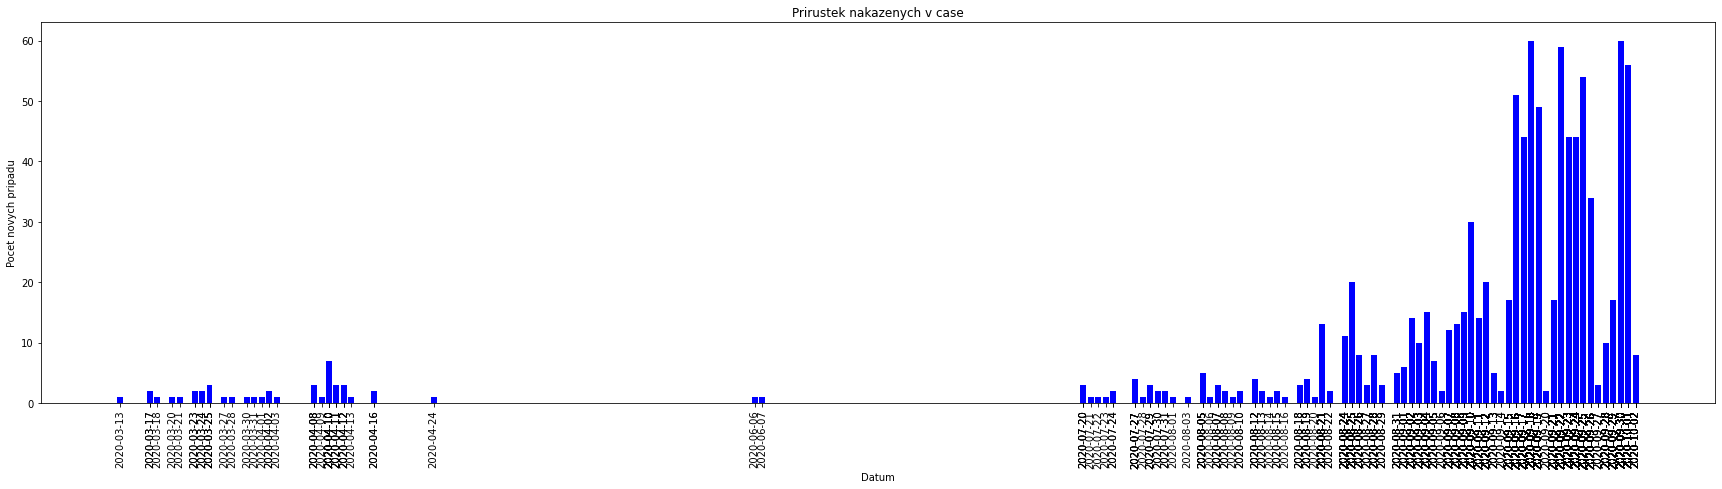

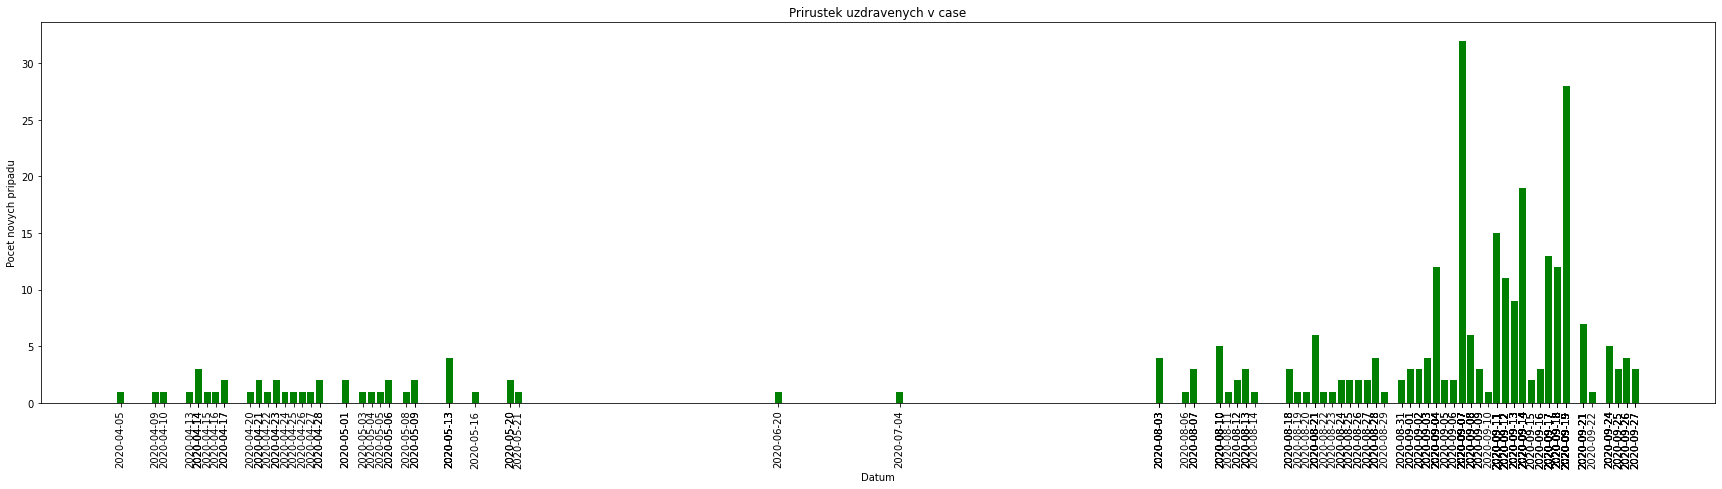

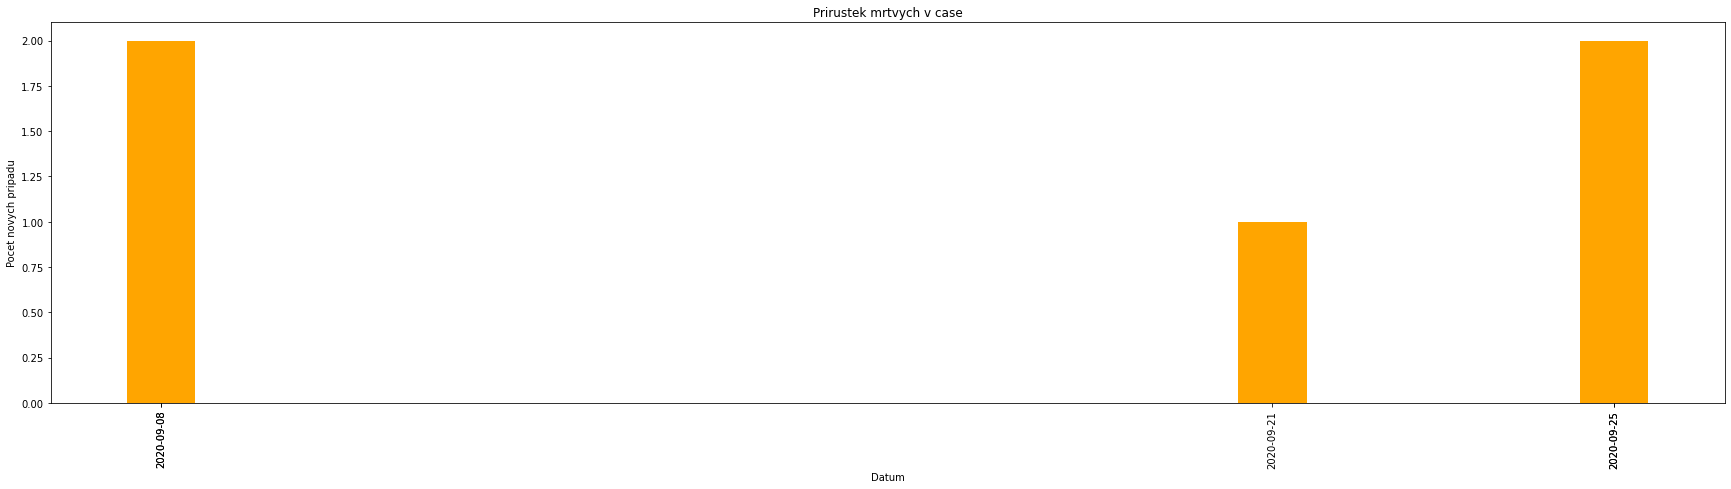

<Figure size 432x288 with 0 Axes>

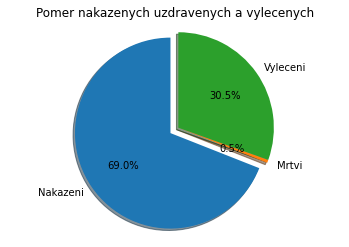

In [8]:
def get_data_for_unit(unit):
    if unit in Kraje.values():
        print(f'Pocty nakazenych, vylecenych a mrtvych pro kraj {unit}')
        data_zobraz_nakazeni = [zaznam for zaznam in NAKAZENI_DATA if zaznam.kraj == unit]
        data_zobraz_mrtvi = [zaznam for zaznam in MRTVI_DATA if zaznam.kraj == unit]
        data_zobraz_uzdraveni = [zaznam for zaznam in VYLECENI_DATA if zaznam.kraj == unit]
    elif unit in Okresy.values():
        print(f'Pocty nakazenych, vylecenych a mrtvych pro okres {unit}')
        data_zobraz_nakazeni = [zaznam for zaznam in NAKAZENI_DATA if zaznam.okres == unit]
        data_zobraz_mrtvi = [zaznam for zaznam in MRTVI_DATA if zaznam.okres == unit]
        data_zobraz_uzdraveni = [zaznam for zaznam in VYLECENI_DATA if zaznam.okres == unit]
    else:
        raise Exception('Nezname jmeno jednotky.')
        
    return (data_zobraz_nakazeni, data_zobraz_uzdraveni, data_zobraz_mrtvi)

def plot_distribution_chart(data, i, title, color='blue'):
    datumy = sorted([i.datum for i in data])
    nove_pripady = []
    for datum in datumy:
        pripady = [zaznam for zaznam in data if zaznam.datum == datum]
        nove_pripady.append(len(pripady))
    
    f = plt.figure(i, figsize=(30,7))
    plt.bar(datumy, nove_pripady, color=color)
    plt.xlabel("Datum")
    plt.ylabel("Pocet novych pripadu")
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xticks(datumy)

def zobraz_stats_pro_usj(jmeno_jednotky):
    data_zobraz_nakazeni, data_zobraz_uzdraveni, data_zobraz_mrtvi = get_data_for_unit(jmeno_jednotky)
    
    print('Pocet nakazenych: ', len(data_zobraz_nakazeni) - len(data_zobraz_mrtvi) - len(data_zobraz_uzdraveni))
    print('Pocet mrtvych: ',len(data_zobraz_mrtvi))
    print('Pocet uzdravenych: ',len(data_zobraz_uzdraveni))
    
    # distribution chart
    plot_distribution_chart(data_zobraz_nakazeni, 1, "Prirustek nakazenych v case", color='blue')
    plot_distribution_chart(data_zobraz_uzdraveni, 2, "Prirustek uzdravenych v case", color='green')
    plot_distribution_chart(data_zobraz_mrtvi, 3, "Prirustek mrtvych v case",color='orange')
    
    # pie chart
    g = plt.figure(4)
    labels = 'Nakazeni', 'Mrtvi', 'Vyleceni'
    explode = (0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.set_title('Pomer nakazenych uzdravenych a vylecenych')
    ax1.pie([len(data_zobraz_nakazeni) - len(data_zobraz_mrtvi) - len(data_zobraz_uzdraveni), len(data_zobraz_mrtvi), len(data_zobraz_uzdraveni)], explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

zobraz_stats_pro_usj(JMENO_JEDNOTKY)

## Vizualizace pro celou CR

Pocet nakazenych:  35296
Pocet mrtvych:  620
Pocet uzdravenych:  32328


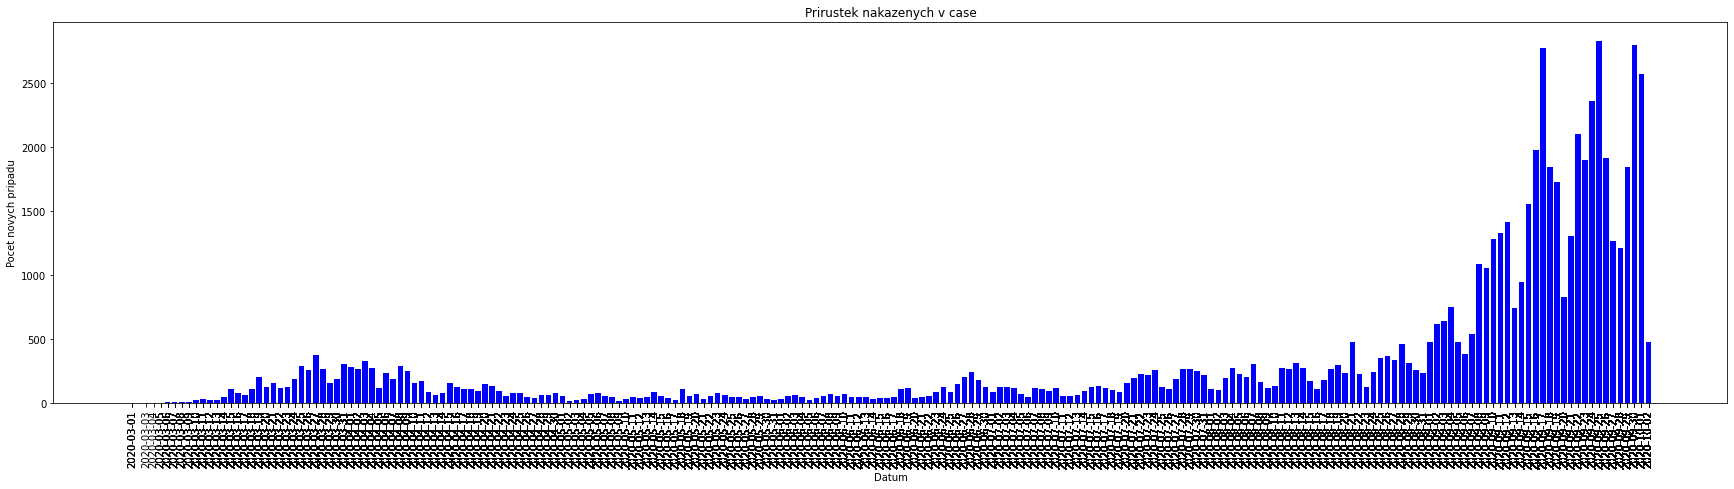

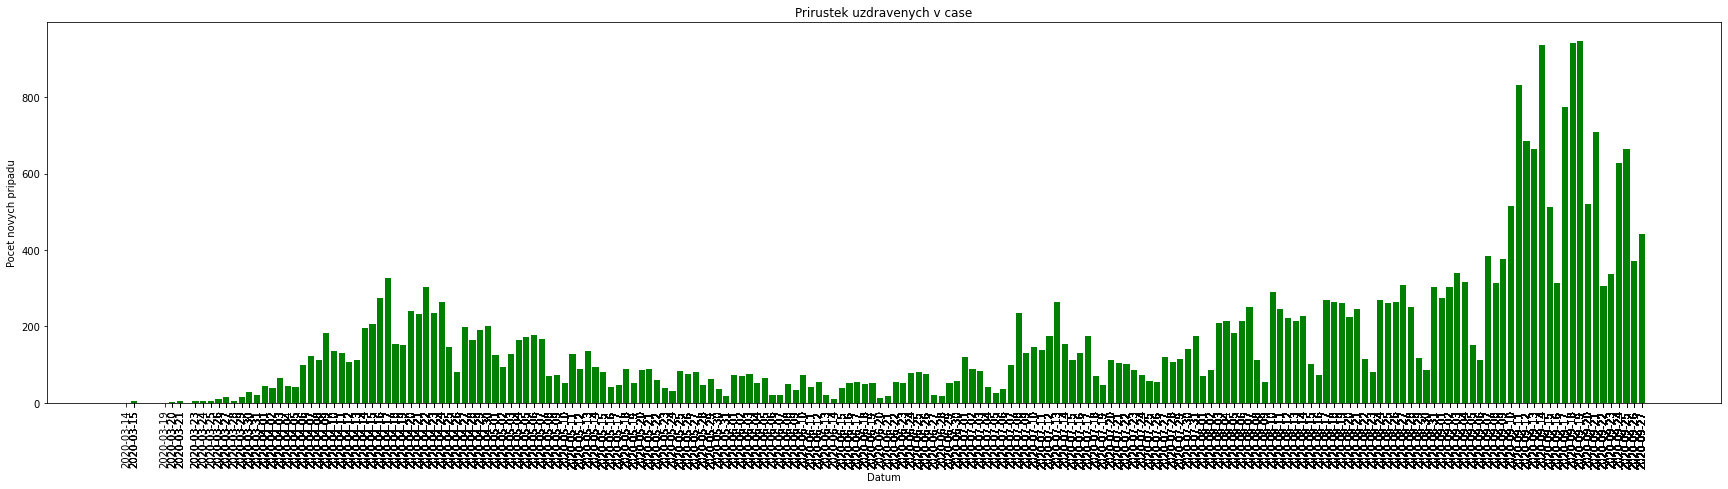

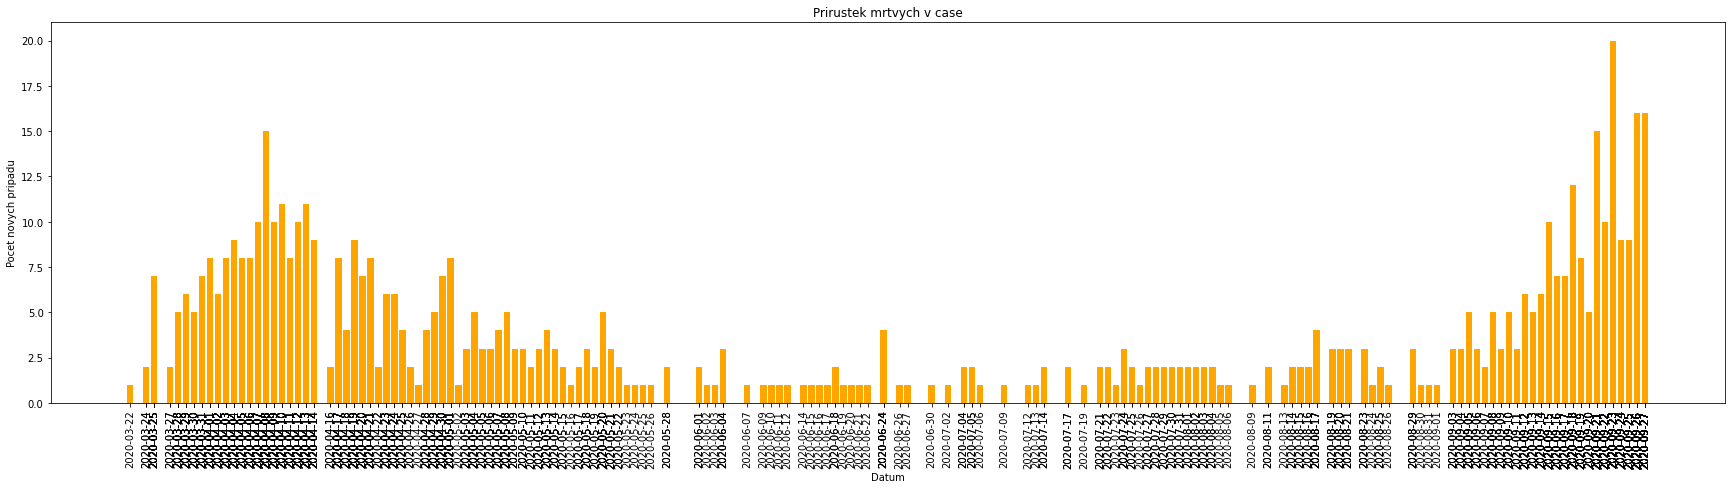

<Figure size 432x288 with 0 Axes>

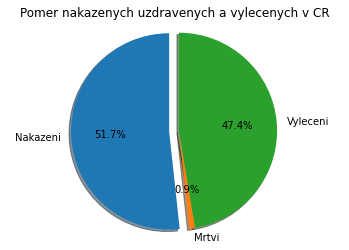

In [9]:
def plot_distribution_chart(data, i, title, color='blue'):
    datumy = sorted([i.datum for i in data])
    nove_pripady = []
    for datum in datumy:
        pripady = [zaznam for zaznam in data if zaznam.datum == datum]
        nove_pripady.append(len(pripady))
    
    f = plt.figure(i, figsize=(30,7))
    plt.bar(datumy, nove_pripady, color=color)
    plt.xlabel("Datum")
    plt.ylabel("Pocet novych pripadu")
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xticks(datumy)

def zobraz_stats_pro_cr():  
    print('Pocet nakazenych: ', len(NAKAZENI_DATA) - len(MRTVI_DATA) - len(VYLECENI_DATA))
    print('Pocet mrtvych: ',len(MRTVI_DATA))
    print('Pocet uzdravenych: ',len(VYLECENI_DATA))
    
    # distribution chart
    plot_distribution_chart(NAKAZENI_DATA, 1, "Prirustek nakazenych v case", color='blue')
    plot_distribution_chart(VYLECENI_DATA, 2, "Prirustek uzdravenych v case", color='green')
    plot_distribution_chart(MRTVI_DATA, 3, "Prirustek mrtvych v case",color='orange')
    
    # pie chart
    g = plt.figure(4)
    labels = 'Nakazeni', 'Mrtvi', 'Vyleceni'
    explode = (0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.set_title('Pomer nakazenych uzdravenych a vylecenych v CR')
    ax1.pie([len(NAKAZENI_DATA) - len(MRTVI_DATA) - len(VYLECENI_DATA), len(MRTVI_DATA), len(VYLECENI_DATA)], explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

zobraz_stats_pro_cr()

## Kumulativni statistiky pro CR

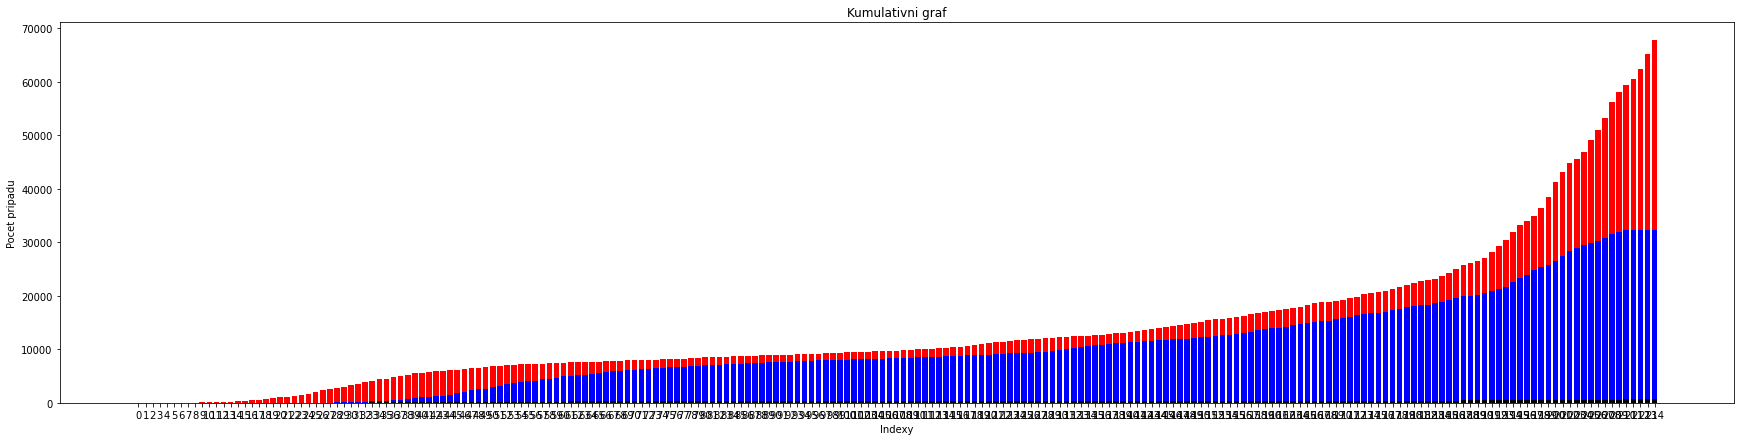

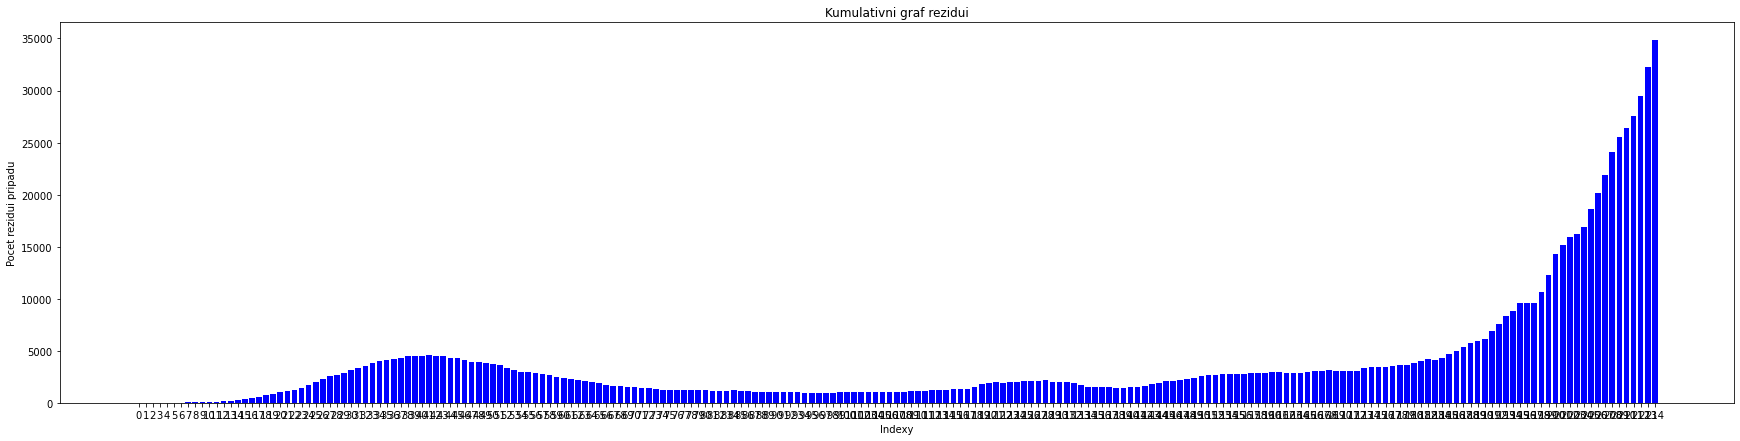

In [10]:
from scipy.interpolate import interp1d
import numpy as np
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield (n, start_date + timedelta(n))

# vytvoreni kumulovane casove rady
datumy_uzdraveni = sorted([i.datum for i in VYLECENI_DATA])
datumy_nakazeni = sorted([i.datum for i in NAKAZENI_DATA])

max_datum = max(datumy_nakazeni[-1], datumy_uzdraveni[-1])
min_datum = min(datumy_nakazeni[0], datumy_uzdraveni[0])
pocet_dni_maximalni = (max_datum - min_datum).days
linspace_datumy_max = np.linspace(0, pocet_dni_maximalni - 1, pocet_dni_maximalni)

## nakazeni
KUMUL_NAKAZENI_CASOVA_RADA = np.zeros(pocet_dni_maximalni)

## uzdraveni
KUMUL_UZDRAVENI_CASOVA_RADA = np.zeros(pocet_dni_maximalni)

## mrtvi
KUMUL_MRTVI_CASOVA_RADA = np.zeros(pocet_dni_maximalni)

# vyplneni kumulativnich statistik nakazeni
for i, datum in daterange(min_datum, max_datum):
    pripady = [zaznam for zaznam in NAKAZENI_DATA if zaznam.datum == datum]
    idx = i-1 if i > 0 else 0
    KUMUL_NAKAZENI_CASOVA_RADA[i] = len(pripady) + KUMUL_NAKAZENI_CASOVA_RADA[idx]

# vyplneni kumulativnich statistik uzdraveni
for i, datum in daterange(min_datum, max_datum):
    pripady = [zaznam for zaznam in VYLECENI_DATA if zaznam.datum == datum]
    idx = i-1 if i > 0 else 0
    KUMUL_UZDRAVENI_CASOVA_RADA[i] = len(pripady) + KUMUL_UZDRAVENI_CASOVA_RADA[idx]

# vyplneni kumulativnich statistik mrtvi
for i, datum in daterange(min_datum, max_datum):
    pripady = [zaznam for zaznam in MRTVI_DATA if zaznam.datum == datum]
    idx = i-1 if i > 0 else 0
    KUMUL_MRTVI_CASOVA_RADA[i] = len(pripady) + KUMUL_MRTVI_CASOVA_RADA[idx]

REZIDUA = KUMUL_NAKAZENI_CASOVA_RADA - KUMUL_UZDRAVENI_CASOVA_RADA - KUMUL_MRTVI_CASOVA_RADA
    
# zobrzeni casovych rad
f = plt.figure(1, figsize=(30,7))
plt.bar(linspace_datumy_max, KUMUL_NAKAZENI_CASOVA_RADA, color='red')
plt.bar(linspace_datumy_max, KUMUL_UZDRAVENI_CASOVA_RADA, color='blue')
plt.bar(linspace_datumy_max, KUMUL_MRTVI_CASOVA_RADA, color='black')
plt.xlabel("Indexy")
plt.ylabel("Pocet pripadu")
plt.title("Kumulativni graf")
plt.xticks(linspace_datumy_max)

f = plt.figure(4, figsize=(30,7))
plt.bar(linspace_datumy_max[:], REZIDUA[:], color='blue')
plt.xlabel("Indexy")
plt.ylabel("Pocet rezidui pripadu")
plt.title("Kumulativni graf rezidui")
plt.xticks(linspace_datumy_max[:])

plt.show()
    

# Regrese

In [11]:
# pocet kroku / indexu do budoucnosti (kazdy krok = jeden den)
pocet_predikovanych_dni = 30

# index vzorku pro start
idx_start = 140

In [12]:
DATA_REGRESSION = REZIDUA[idx_start:]
X = np.linspace(0, len(DATA_REGRESSION) -1, len(DATA_REGRESSION))
X_test = np.linspace(0, pocet_predikovanych_dni + len(REZIDUA) - idx_start - 1, pocet_predikovanych_dni + len(REZIDUA) - idx_start).reshape(-1, 1)


### Linearni regrese

In [13]:
from sklearn import linear_model

# fit model
reg = linear_model.LinearRegression()
reg.fit(X.reshape(-1, 1), DATA_REGRESSION)

# zaokrouhleni predikce na cele jedince
yHat = np.around(reg.predict(X_test), 0)

### Polynomialni regrese

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X.reshape(-1, 1))

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, DATA_REGRESSION)
  
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

### Vyhodnoceni

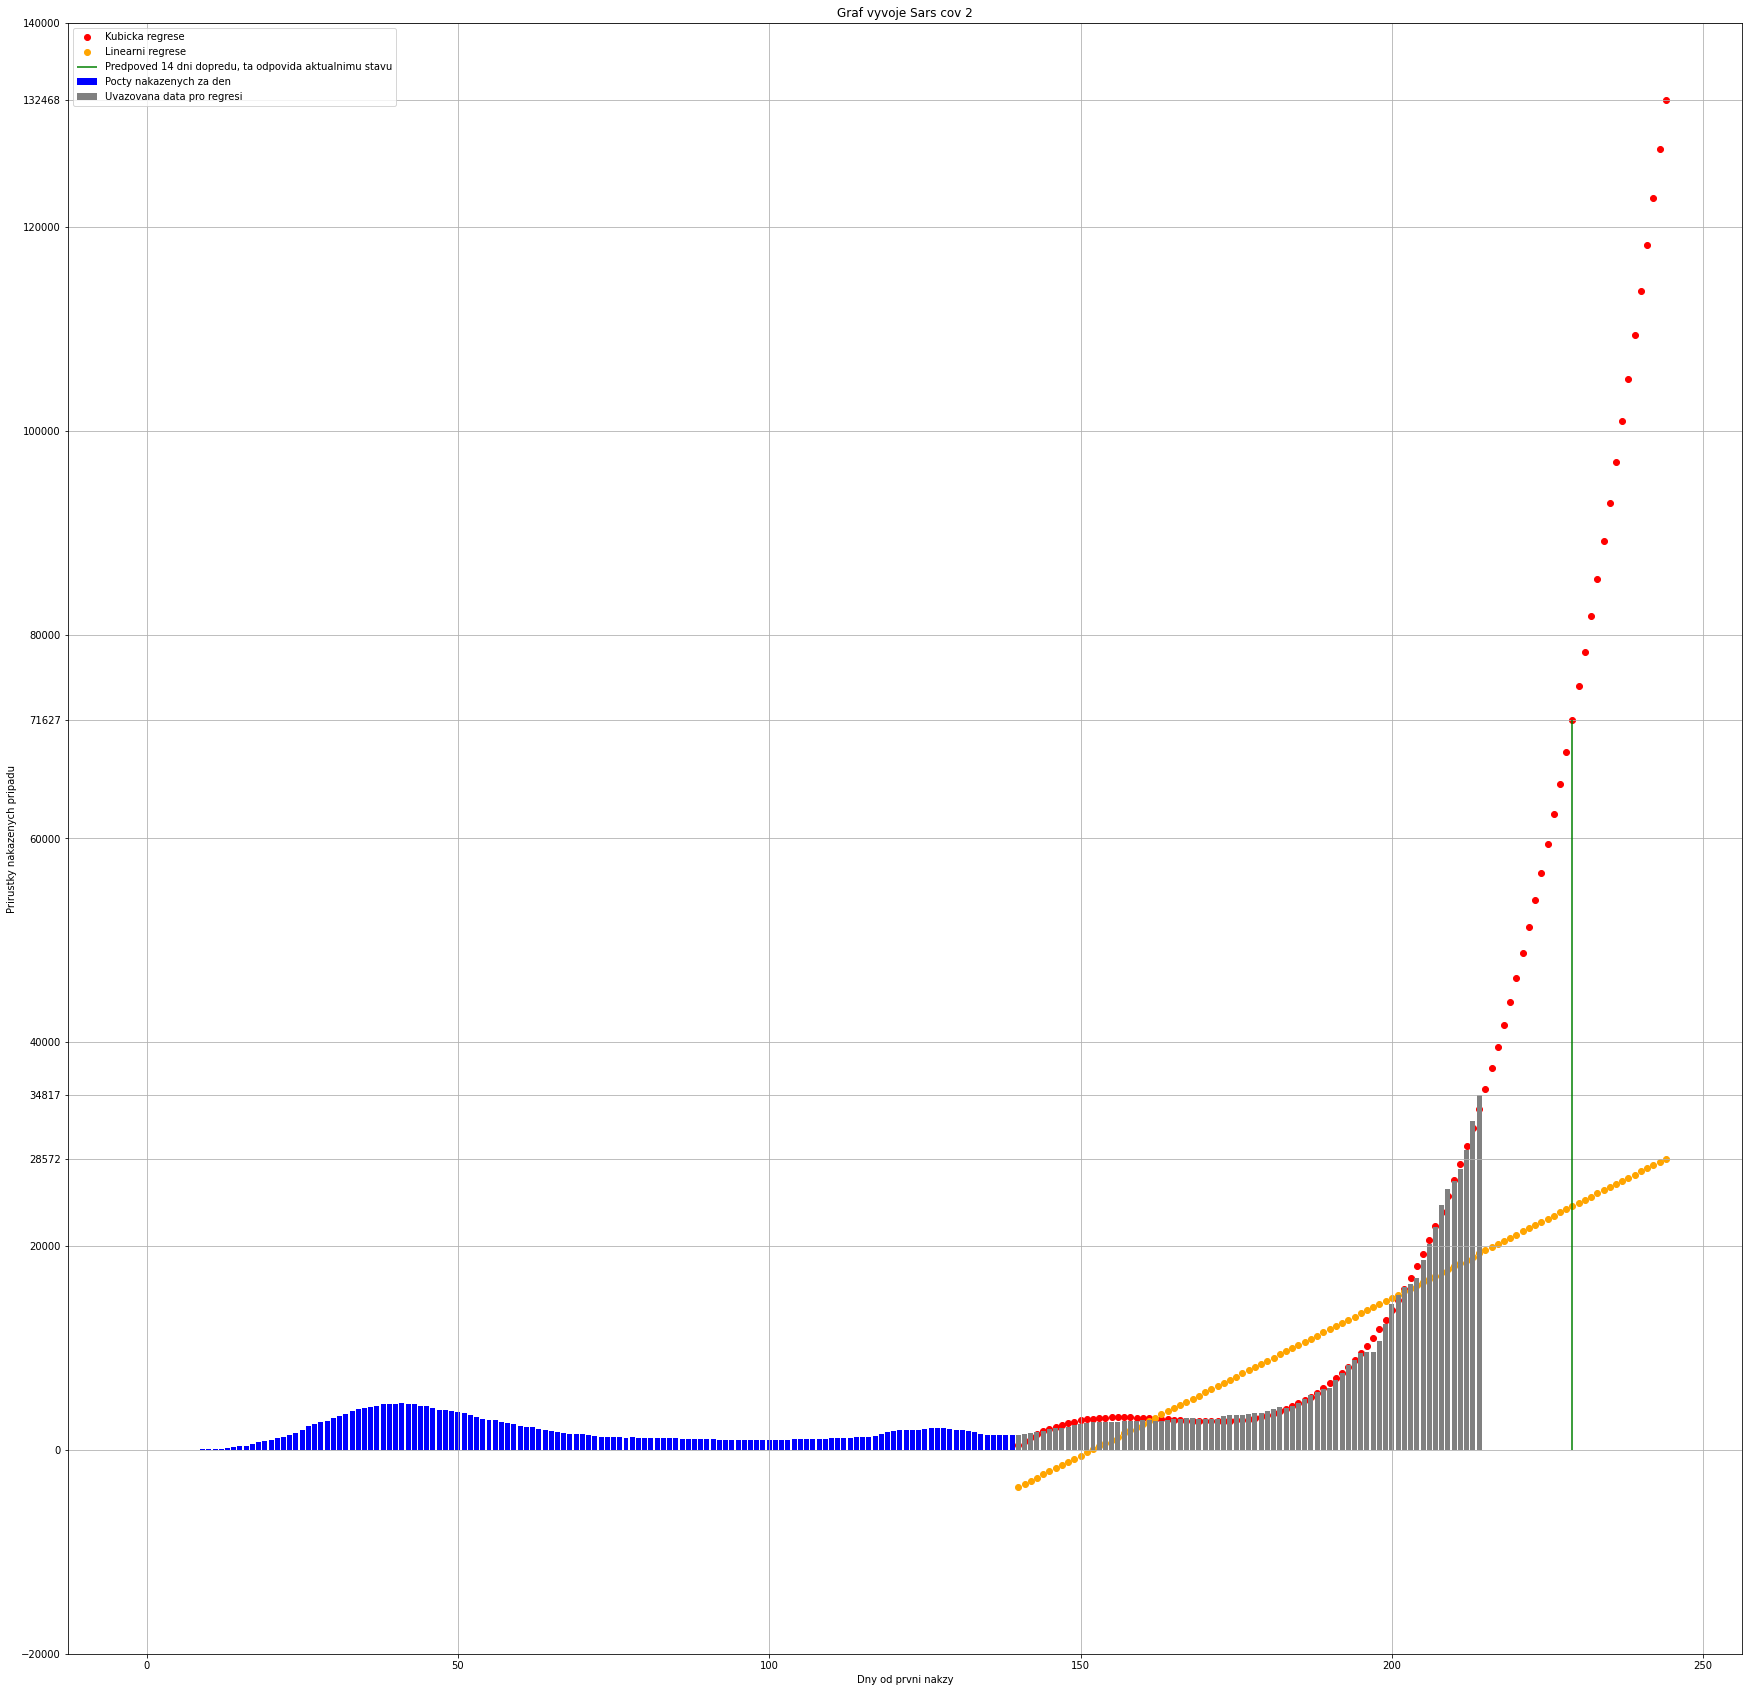

In [15]:
from datetime import date

# vykresleni regrese
f = plt.figure(5, figsize=(30,30))
plt.scatter(np.linspace(0, len(y_test_predict) -1, len(y_test_predict)) + idx_start, y_test_predict, color='red')
plt.scatter(np.linspace(0, len(yHat) -1, len(yHat)) + idx_start, yHat, color='orange')
plt.bar(np.linspace(0, len(REZIDUA) -1, len(REZIDUA)), REZIDUA, color='blue')
plt.bar(X + idx_start, DATA_REGRESSION, color='grey')
plt.vlines(14 + len(REZIDUA), 0, y_test_predict[len(REZIDUA) - idx_start + 14], color='green')
plt.xlabel("Dny od prvni nakzy")
plt.ylabel("Prirustky nakazenych pripadu")
plt.title("Graf vyvoje Sars cov 2")
plt.yticks(list(plt.yticks()[0]) + [y_test_predict[len(REZIDUA) - idx_start + 14], REZIDUA[-1], y_test_predict[-1], yHat[-1]])
plt.grid()
plt.legend(['Kubicka regrese', 'Linearni regrese', 'Predpoved 14 dni dopredu, ta odpovida aktualnimu stavu', 'Pocty nakazenych za den', 'Uvazovana data pro regresi'])

plt.savefig(f'vyvoj_covid_{date.today().strftime("%d_%m_%y")}.pdf')

In [16]:
print('Hotovo')

Hotovo
